In [1]:
# Analyze the correlations between homelessness and other variables: 
# Population, Unemployment rate, and Cost of Living indexes (exclude real estate values / rental etc)
# Utilize homeless data cleaned up by Jagatha HUD_Consol_Data.csv for analysis with Census_Consol_Data.csv

In [2]:
# dependencies
import csv
import os
import pandas as pd
from pandas import *
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# load csv file
# Consolidate census file - path_1
# Consolidate HUD file - path_2

file_path_1 = os.path.join('Census_Consol_Data.csv')
file_path_2 = os.path.join('..','data','HUD_Consol_Data.csv')
file_path_3 = os.path.join('State_Abbre.csv')

# read the csv file
Other_variables_data = pd.read_csv(file_path_1, encoding = "ISO-8859-1")
HUD_data = pd.read_csv(file_path_2, encoding = "ISO-8859-1")
State_abbre = pd.read_csv(file_path_3, encoding = "ISO-8859-1")

In [4]:
# Display dataframes
Other_variables_data.head()

,State,Population_2007,Population_2017,Unemployment_2017,Cost_of_living_2017
0,Alabama,4672840.0,4874747.0,3.5,90.2
1,Alaska,680300.0,739795.0,7.2,131.9
2,Arizona,6167681.0,7016270.0,4.3,96.0
3,Arkansas,2848650.0,3004279.0,3.7,87.7
4,California,36250311.0,39536653.0,4.6,140.5


In [5]:
HUD_data = HUD_data[["Year","State","Total Homeless"]]
HUD_data["Total Homeless"] = pd.to_numeric(HUD_data["Total Homeless"], errors='coerce')
HUD_data.head()

,Year,State,Total Homeless
0,2017,AK,1128.0
1,2017,AK,717.0
2,2017,AL,1092.0
3,2017,AL,606.0
4,2017,AL,155.0


In [6]:
State_abbre.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
# Change the State in Census data to Abbreviation
State_abbre
merge_state_abbre = pd.merge(Other_variables_data, State_abbre, how = "outer", on = "State")
merge_state_abbre.head()

,State,Population_2007,Population_2017,Unemployment_2017,Cost_of_living_2017,Abbreviation
0,Alabama,4672840.0,4874747.0,3.5,90.2,AL
1,Alaska,680300.0,739795.0,7.2,131.9,AK
2,Arizona,6167681.0,7016270.0,4.3,96.0,AZ
3,Arkansas,2848650.0,3004279.0,3.7,87.7,AR
4,California,36250311.0,39536653.0,4.6,140.5,CA


In [8]:
# drop the column that is redundant 
merge_state_abbre['State']=merge_state_abbre["Abbreviation"]
final_census_df = merge_state_abbre.drop(columns=['Abbreviation'])
final_census_df.head()

,State,Population_2007,Population_2017,Unemployment_2017,Cost_of_living_2017
0,AL,4672840.0,4874747.0,3.5,90.2
1,AK,680300.0,739795.0,7.2,131.9
2,AZ,6167681.0,7016270.0,4.3,96.0
3,AR,2848650.0,3004279.0,3.7,87.7
4,CA,36250311.0,39536653.0,4.6,140.5


In [9]:
# HUD data : group by year
# group data by year
hud_change_df = HUD_data[HUD_data["Year"].isin([2007,2017])]
hud_change_group = hud_change_df.groupby(["Year","State"])["Total Homeless"].sum()
hud_df = pd.DataFrame(hud_change_group)
hud_df = hud_df.reset_index()
hud_df = hud_df.pivot(index='State', columns='Year', values='Total Homeless')
hud_df = hud_df.reset_index()
# hud_df.columns = hud_df.columns.astype(str)
# hud_df.rename(columns = {'2007':'Homeless_2007','2017':'Homeless_2017'})
hud_df.head()

Year,State,2007,2017
0,AK,1642.0,1845.0
1,AL,5452.0,3793.0
2,AR,3836.0,2467.0
3,AZ,14646.0,8947.0
4,CA,138986.0,134278.0


In [10]:
# merge two files
merge_hud_census = pd.merge(final_census_df,hud_df,how="inner",on = "State")
merge_hud_census.columns = merge_hud_census.columns.astype(str)
hud_census_df = merge_hud_census.rename(index=str, columns = {'2007':'Homeless_2007','2017':'Homeless_2017'})
hud_census_df.head()


,State,Population_2007,Population_2017,Unemployment_2017,Cost_of_living_2017,Homeless_2007,Homeless_2017
0,AL,4672840.0,4874747.0,3.5,90.2,5452.0,3793.0
1,AK,680300.0,739795.0,7.2,131.9,1642.0,1845.0
2,AZ,6167681.0,7016270.0,4.3,96.0,14646.0,8947.0
3,AR,2848650.0,3004279.0,3.7,87.7,3836.0,2467.0
4,CA,36250311.0,39536653.0,4.6,140.5,138986.0,134278.0


In [11]:
# hud_census_df = hud_census_df.set_index('State')
# hud_census_df.to_csv("hud_census_data.csv")

In [12]:
hud_census_df['Homeless%_2007']=hud_census_df['Homeless_2007']/hud_census_df['Population_2007']*100
hud_census_df['Homeless%_2017']=hud_census_df['Homeless_2017']/hud_census_df['Population_2017']*100
hud_census_df = hud_census_df.set_index('State')
hud_census_df

,Population_2007,Population_2017,Unemployment_2017,Cost_of_living_2017,Homeless_2007,Homeless_2017,Homeless%_2007,Homeless%_2017
State,,,,,,,,
AL,4672840.0,4874747.0,3.5,90.2,5452.0,3793.0,0.116674,0.077809
AK,680300.0,739795.0,7.2,131.9,1642.0,1845.0,0.241364,0.249393
AZ,6167681.0,7016270.0,4.3,96.0,14646.0,8947.0,0.237464,0.127518
AR,2848650.0,3004279.0,3.7,87.7,3836.0,2467.0,0.134660,0.082116
CA,36250311.0,39536653.0,4.6,140.5,138986.0,134278.0,0.383406,0.339629
CO,4803868.0,5607154.0,2.9,104.0,14225.0,10940.0,0.296116,0.195108
CT,3527270.0,3588184.0,4.6,124.9,4482.0,3388.0,0.127067,0.094421
DE,871749.0,961939.0,4.7,103.5,1061.0,994.0,0.121709,0.103333
DC,574404.0,693972.0,6.4,157.4,5320.0,7473.0,0.926177,1.076845


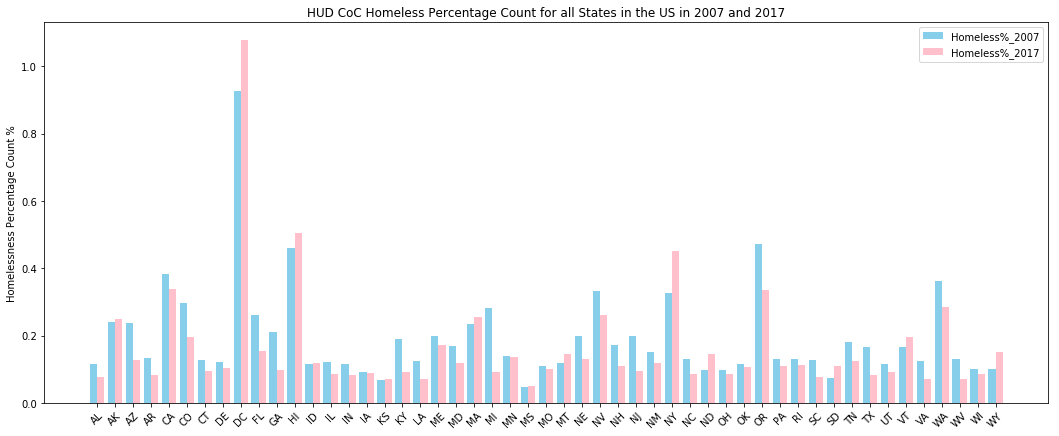

In [13]:
# Homelessness Change Summary based on percentage of homeless

ind = np.arange(len(hud_census_df['Homeless%_2007']))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(ind - width/2, hud_census_df['Homeless%_2007'], width, color='SkyBlue', label='Homeless%_2007')
rects2 = ax.bar(ind + width/2, hud_census_df['Homeless%_2017'], width, color='Pink', label='Homeless%_2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homelessness Percentage Count %')
ax.set_title('HUD CoC Homeless Percentage Count for all States in the US in 2007 and 2017')
ax.set_xticks(ind)
ax.set_xticklabels((hud_census_df.index),rotation=45)
ax.legend()

# Save the figure
plt.savefig("Homelessness_Change_Summary_Percentage.png")

# Show graph
plt.show()

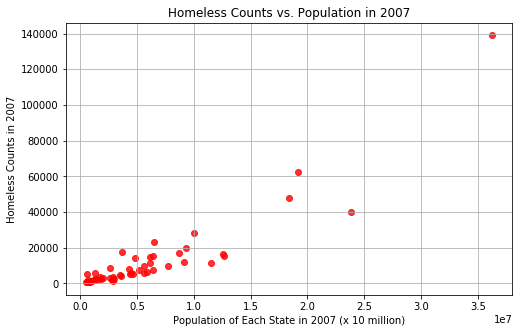

In [18]:
# Plot homeless vs population in 2007 
fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Population_2007"], 
            hud_census_df["Homeless_2007"],
            color="red", marker="o", 
            alpha=0.8)

# Incorporate gragh
plt.title("Homeless Counts vs. Population in 2007")
plt.ylabel("Homeless Counts in 2007")
plt.xlabel("Population of Each State in 2007 (x 10 million)") 
plt.grid(True) 

plt.savefig("Homeless_vs_Population_2007.png")
plt.show()

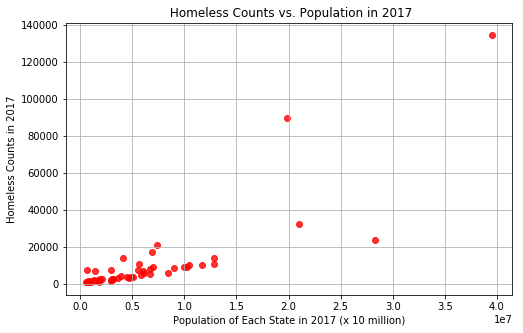

In [19]:
# Plot homeless vs population in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Population_2017"], 
            hud_census_df["Homeless_2017"],
            color="red", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Homeless Counts vs. Population in 2017")
plt.ylabel("Homeless Counts in 2017")
plt.xlabel("Population of Each State in 2017 (x 10 million)") 
plt.grid(True) 

plt.savefig("Homeless_vs_Population_2017.png")
plt.show()

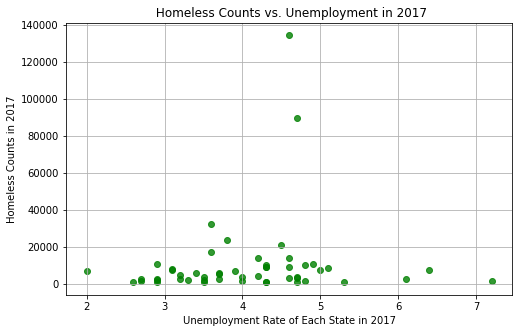

In [29]:
# Plot homeless vs unemployment rate in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Unemployment_2017"], 
            hud_census_df["Homeless_2017"],
            color="green", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Homeless Counts vs. Unemployment in 2017")
plt.ylabel("Homeless Counts in 2017")
plt.xlabel("Unemployment Rate of Each State in 2017") 
plt.grid(True) 

plt.savefig("Homeless_vs_Unemployment_2017.png")
plt.show()

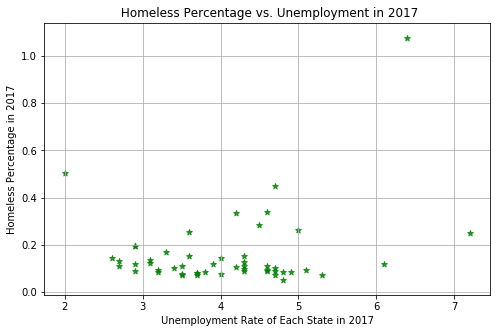

In [31]:
# Plot homeless percentage vs unemployment rate in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Unemployment_2017"], 
            hud_census_df["Homeless%_2017"],
            color="green", marker="*", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Homeless Percentage vs. Unemployment in 2017")
plt.ylabel("Homeless Percentage in 2017")
plt.xlabel("Unemployment Rate of Each State in 2017") 
plt.grid(True) 

plt.savefig("Homeless_percentage_vs_Unemployment_2017.png")
plt.show()

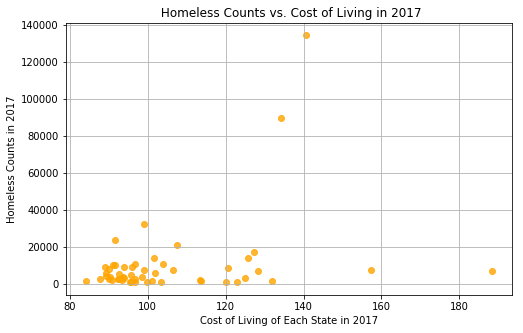

In [32]:
# Plot homeless vs cost of living in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Cost_of_living_2017"], 
            hud_census_df["Homeless_2017"],
            color="orange", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Homeless Counts vs. Cost of Living in 2017")
plt.ylabel("Homeless Counts in 2017")
plt.xlabel("Cost of Living of Each State in 2017") 
plt.grid(True) 

plt.savefig("Homeless_vs_Cost_of_living_2017.png")
plt.show()

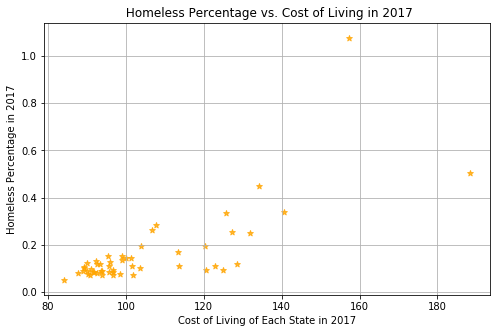

In [33]:
# Plot homeless vs cost of living in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Cost_of_living_2017"], 
            hud_census_df["Homeless%_2017"],
            color="orange", marker="*", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Homeless Percentage vs. Cost of Living in 2017")
plt.ylabel("Homeless Percentage in 2017")
plt.xlabel("Cost of Living of Each State in 2017") 
plt.grid(True) 

plt.savefig("Homeless_percentage_vs_Cost_of_living_2017.png")
plt.show()

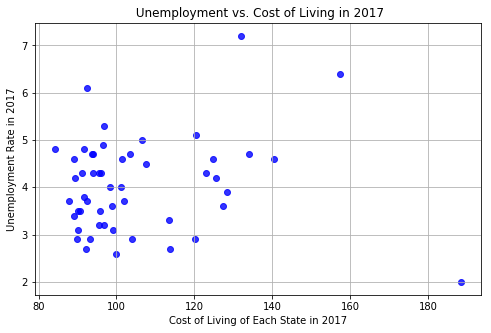

In [26]:
# Plot homeless vs cost of living in 2017

fig = plt.figure(figsize=(8,5)) 

plt.scatter(hud_census_df["Cost_of_living_2017"],
            hud_census_df["Unemployment_2017"],
            color = "blue", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(" Unemployment vs. Cost of Living in 2017")
plt.ylabel("Unemployment Rate in 2017")
plt.xlabel("Cost of Living of Each State in 2017") 
plt.grid(True) 

# plt.savefig("Homeless_vs_Cost_of_living_2017.png")
plt.show()